In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
#importing files  and examine the data set
df = pd.read_csv('/content/bollywood.csv')

print(df.head(10))
print(df.tail(10))

   SlNo Release Date                   MovieName ReleaseTime      Genre  \
0     1    18-Apr-14                    2 States          LW    Romance   
1     2     4-Jan-13                Table No. 21           N  Thriller    
2     3    18-Jul-14          Amit Sahni Ki List           N     Comedy   
3     4     4-Jan-13            Rajdhani Express           N     Drama    
4     5     4-Jul-14                Bobby Jasoos           N     Comedy   
5     6    30-May-14                  Citylights          HS     Drama    
6     7    19-Sep-14               Daawat-E-Ishq           N     Comedy   
7     8    11-Jan-13  Matru Ki Bijlee Ka Mandola           N     Comedy   
8     9    10-Jan-14                Dedh Ishqiya          LW     Comedy   
9    10    11-Jan-13                   Gangoobai           N     Drama    

   Budget  BoxOfficeCollection  YoutubeViews  YoutubeLikes  YoutubeDislikes  
0      36               104.00       8576361         26622             2527  
1      10         

In [9]:
#extracting details about the data set
print(df.info())
print(df.describe())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   SlNo                 149 non-null    int64  
 1   Release Date         149 non-null    object 
 2   MovieName            149 non-null    object 
 3   ReleaseTime          149 non-null    object 
 4   Genre                149 non-null    object 
 5   Budget               149 non-null    int64  
 6   BoxOfficeCollection  149 non-null    float64
 7   YoutubeViews         149 non-null    int64  
 8   YoutubeLikes         149 non-null    int64  
 9   YoutubeDislikes      149 non-null    int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 11.8+ KB
None
             SlNo      Budget  BoxOfficeCollection  YoutubeViews  \
count  149.000000  149.000000           149.000000  1.490000e+02   
mean    75.000000   29.442953            55.667248  3.337920e+06   
std     43.156691   28.

In [10]:
#1.How many records are present in the dataset? Print the metadata information of the dataset.

print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   SlNo                 149 non-null    int64  
 1   Release Date         149 non-null    object 
 2   MovieName            149 non-null    object 
 3   ReleaseTime          149 non-null    object 
 4   Genre                149 non-null    object 
 5   Budget               149 non-null    int64  
 6   BoxOfficeCollection  149 non-null    float64
 7   YoutubeViews         149 non-null    int64  
 8   YoutubeLikes         149 non-null    int64  
 9   YoutubeDislikes      149 non-null    int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 11.8+ KB
None


In [25]:
#How many movies got released in each genre? Which genre had the highest number of releases? Sort the number of releases in each genre in descending order.


genre_counts=df['Genre'].value_counts()
in_order=df['Genre'].value_counts().sort_values(ascending=False)
highest_count=genre_counts.max()
print(genre_counts)
print(highest_count)
print(in_order)






Genre
Comedy       36
 Drama       35
Thriller     26
Romance      25
Action       21
Thriller      3
Action        3
Name: count, dtype: int64
36
Genre
Comedy       36
 Drama       35
Thriller     26
Romance      25
Action       21
Thriller      3
Action        3
Name: count, dtype: int64


In [26]:

#How many movies in each genre got released in different release times like long weekend, festive season, etc. (Note: Do a cross tabulation between Genre and ReleaseTime.)

release_crosstab = pd.crosstab(df['Genre'], df['ReleaseTime'])

print("Cross tabulation between Genre and Release Time:")
print(release_crosstab)

Cross tabulation between Genre and Release Time:
ReleaseTime  FS  HS  LW   N
Genre                      
 Drama        4   6   1  24
Action        3   3   3  12
Action        0   0   0   3
Comedy        3   5   5  23
Romance       3   3   4  15
Thriller      4   1   1  20
Thriller      0   0   1   2


In [30]:
  #Which month of the year, maximum number movie releases are seen?
  df['Release Date'] = pd.to_datetime(df['Release Date'])
  df['Month'] = df['Release Date'].dt.month_name()
  month_counts = df['Month'].value_counts()
  max_release_month = month_counts.idxmax()
  print(max_release_month)
  movie_count = month_counts.max()


January


In [31]:
#Which month of the year typically sees most releases of high budgeted movies, that is, movies with a budget of 25 crore or more?
high_budget_df = df[df['Budget'] >= 25].copy()
high_budget_month_counts = high_budget_df['Month'].value_counts()
print("Number of high-budget movie releases per month:")
print(high_budget_month_counts)
busiest_month_high_budget = high_budget_month_counts.idxmax()
movie_count_high_budget = high_budget_month_counts.max()

print(f"\nThe month with the most releases of high-budget movies is {busiest_month_high_budget} with {movie_count_high_budget} movies.")



Number of high-budget movie releases per month:
Month
February     9
January      8
August       7
March        7
November     6
July         6
June         5
September    5
April        4
October      4
May          3
December     2
Name: count, dtype: int64

The month with the most releases of high-budget movies is February with 9 movies.


In [32]:
#Which are the top 10 movies with maximum return on investment (ROI)? Calculate return on investment (ROI)
df['ROI'] = (df['BoxOfficeCollection'] - df['Budget']) / df['Budget']
top_movies_df = df.sort_values(by='ROI', ascending=False)
print("Top 10 movies by Return on Investment (ROI):")
print(top_movies_df[['MovieName', 'ROI']].head(10))

Top 10 movies by Return on Investment (ROI):
                     MovieName       ROI
64                  Aashiqui 2  8.166667
89                          PK  7.647059
132                Grand Masti  7.514286
135               The Lunchbox  7.500000
87                      Fukrey  6.240000
58                    Mary Kom  5.933333
128                     Shahid  5.666667
37   Humpty Sharma Ki Dulhania  5.500000
101         Bhaag Milkha Bhaag  4.466667
115            Chennai Express  4.266667


In [34]:
#Do the movies have higher ROI if they get released on festive seasons or long weekend? Calculate the average ROI for different release times.
avg_roi_by_releasetime = df.groupby('ReleaseTime')['ROI'].mean().sort_values(ascending=False)

print("Average ROI for each Release Time:")
print(avg_roi_by_releasetime)

Average ROI for each Release Time:
ReleaseTime
LW    1.127205
FS    0.973853
HS    0.850867
N     0.657722
Name: ROI, dtype: float64


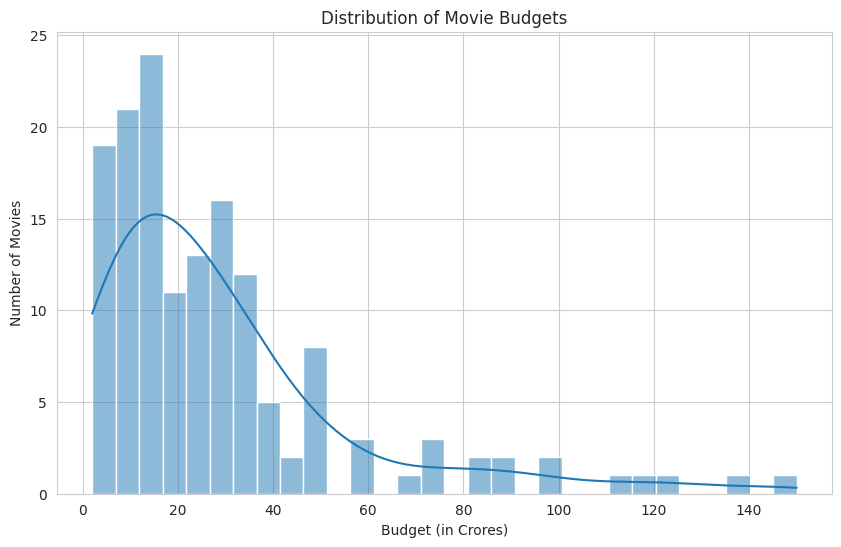

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame

# Set the style for a nicer-looking plot
sns.set_style('whitegrid')

# Create a histogram with a Kernel Density Estimate (KDE) plot overlaid
plt.figure(figsize=(10, 6)) # Adjust figure size for better readability
sns.histplot(df['Budget'], kde=True, bins=30) # kde=True adds the distribution line

# Add titles and labels for clarity
plt.title('Distribution of Movie Budgets')
plt.xlabel('Budget (in Crores)')
plt.ylabel('Number of Movies')

# Display the plot
plt.show()

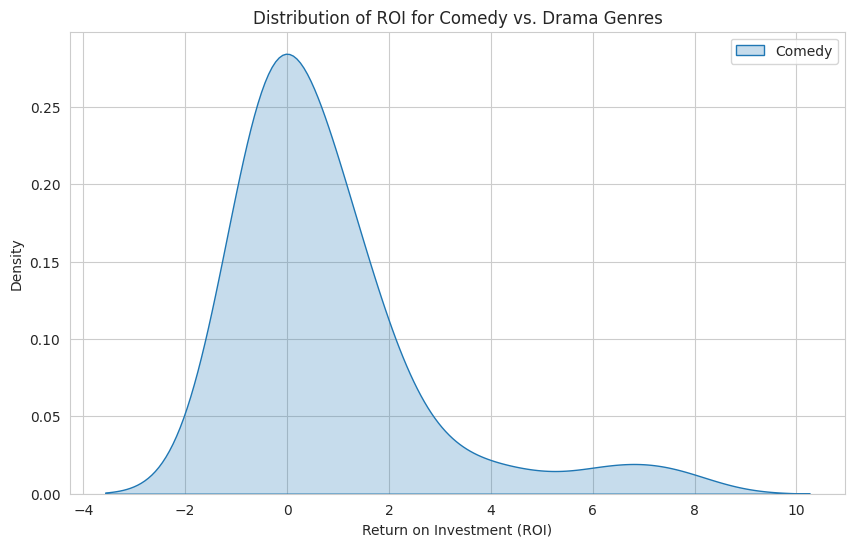

--- Statistical Comparison of ROI ---
Median ROI for Comedy: 0.24
Median ROI for Drama:  nan


Mean ROI for Comedy:   0.79
Mean ROI for Drama:    nan


In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' has the 'ROI' column

# --- Step 1: Filter the data for each genre ---
comedy_roi = df[df['Genre'] == 'Comedy']['ROI']
drama_roi = df[df['Genre'] == 'Drama']['ROI']

# --- Step 2: Visualize the distributions ---
plt.figure(figsize=(10, 6))
# Plot Kernel Density Estimate for both genres on the same axes
sns.kdeplot(comedy_roi, label='Comedy', fill=True)
sns.kdeplot(drama_roi, label='Drama', fill=True)

plt.title('Distribution of ROI for Comedy vs. Drama Genres')
plt.xlabel('Return on Investment (ROI)')
plt.ylabel('Density')
plt.legend() # Show the legend to identify the lines
plt.show()

# --- Step 3: Calculate summary statistics for a precise comparison ---
print("--- Statistical Comparison of ROI ---")
print(f"Median ROI for Comedy: {comedy_roi.median():.2f}")
print(f"Median ROI for Drama:  {drama_roi.median():.2f}")
print("\n")
print(f"Mean ROI for Comedy:   {comedy_roi.mean():.2f}")
print(f"Mean ROI for Drama:    {drama_roi.mean():.2f}")

The correlation coefficient between Box Office Collection and YouTube Likes is: 0.68
This indicates a positive correlation.


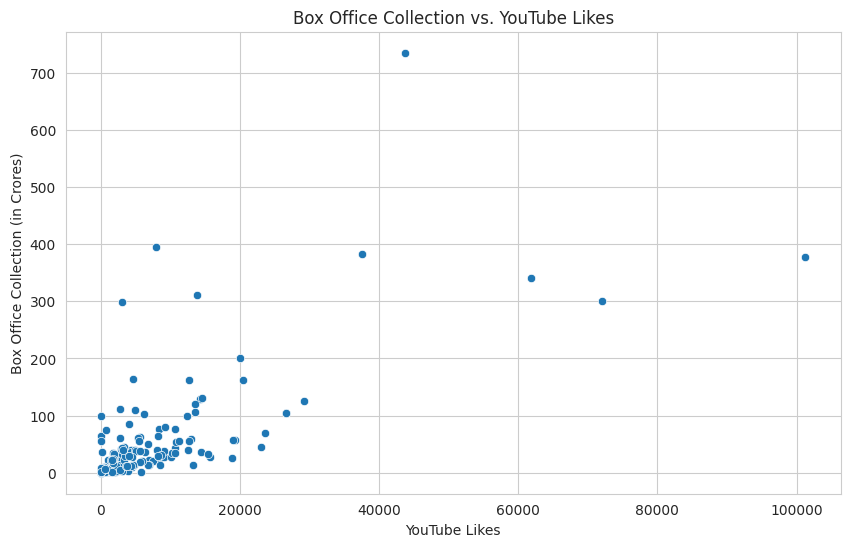

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame

# --- Step 1: Calculate the correlation coefficient ---
# We select the two columns and use the .corr() method.
correlation = df['BoxOfficeCollection'].corr(df['YoutubeLikes'])

print(f"The correlation coefficient between Box Office Collection and YouTube Likes is: {correlation:.2f}")

# --- Step 2: Interpret the result ---
if correlation > 0:
    print("This indicates a positive correlation.")
elif correlation < 0:
    print("This indicates a negative correlation.")
else:
    print("This indicates no correlation.")

# --- (Optional but Recommended) Step 3: Visualize with a scatter plot ---
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='YoutubeLikes', y='BoxOfficeCollection')
plt.title('Box Office Collection vs. YouTube Likes')
plt.xlabel('YouTube Likes')
plt.ylabel('Box Office Collection (in Crores)')
plt.show()